In [1]:
import pandas as pd




In [2]:
df = pd.read_csv('AXP.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,1.269159,0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,1.263629,0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,1.238745,0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,1.172383,0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,1.158557,0
...,...,...,...,...,...,...,...
12791,2023-02-22,173.559998,176.020004,172.929993,174.699997,174.699997,2468800
12792,2023-02-23,175.240005,176.600006,172.860001,175.139999,175.139999,2575300
12793,2023-02-24,173.690002,174.940002,172.190002,174.250000,174.250000,1667000
12794,2023-02-27,175.529999,175.690002,173.080002,173.300003,173.300003,1909000


In [3]:
df = df[['Date','Close']]
df

,Date,Close
0,1972-06-01,3.693287
1,1972-06-02,3.677195
2,1972-06-05,3.604777
3,1972-06-06,3.411664
4,1972-06-07,3.371432
...,...,...
12791,2023-02-22,174.699997
12792,2023-02-23,175.139999
12793,2023-02-24,174.250000
12794,2023-02-27,173.300003


In [4]:
df['Date']

0        1972-06-01
1        1972-06-02
2        1972-06-05
3        1972-06-06
4        1972-06-07
            ...    
12791    2023-02-22
12792    2023-02-23
12793    2023-02-24
12794    2023-02-27
12795    2023-02-28
Name: Date, Length: 12796, dtype: object

In [5]:
import datetime

def string_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_obj = string_to_datetime('2010-10-20')
datetime_obj

datetime.datetime(2010, 10, 20, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(string_to_datetime)
df['Date']

<ipython-input-6-7aee5573d46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(string_to_datetime)


0       1972-06-01
1       1972-06-02
2       1972-06-05
3       1972-06-06
4       1972-06-07
           ...    
12791   2023-02-22
12792   2023-02-23
12793   2023-02-24
12794   2023-02-27
12795   2023-02-28
Name: Date, Length: 12796, dtype: datetime64[ns]

In [7]:
df

,Date,Close
0,1972-06-01,3.693287
1,1972-06-02,3.677195
2,1972-06-05,3.604777
3,1972-06-06,3.411664
4,1972-06-07,3.371432
...,...,...
12791,2023-02-22,174.699997
12792,2023-02-23,175.139999
12793,2023-02-24,174.250000
12794,2023-02-27,173.300003


In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432
...,...
2023-02-22,174.699997
2023-02-23,175.139999
2023-02-24,174.250000


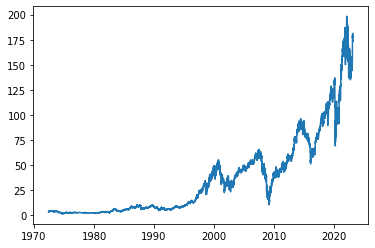

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_datetime(first_date_str)
  last_date  = string_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1972-06-06', 
                                '2023-02-28', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1972-06-06,3.693287,3.677195,3.604777,3.411664
1,1972-06-07,3.677195,3.604777,3.411664,3.371432
2,1972-06-08,3.604777,3.411664,3.371432,3.451896
3,1972-06-09,3.411664,3.371432,3.451896,3.427757
4,1972-06-12,3.371432,3.451896,3.427757,3.484082
...,...,...,...,...,...
12788,2023-02-22,177.940002,177.300003,173.479996,174.699997
12789,2023-02-23,177.300003,173.479996,174.699997,175.139999
12790,2023-02-24,173.479996,174.699997,175.139999,174.250000
12791,2023-02-27,174.699997,175.139999,174.250000,173.300003


In [13]:
def wdf_to_date_ip_op(windowed_df):
  df_as_np = windowed_df.to_numpy()

  dates = df_as_np[:,0]
  middle_matrix = df_as_np[:,1:-1]
  x = middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
  y = df_as_np[:,-1]
  return dates, x, y

dates, x, y = wdf_to_date_ip_op(windowed_df)
dates.shape, x.shape, y.shape

((12793,), (12793, 3, 1), (12793,))

In [ ]:
# TRAIN VALIDATION AND TESTING

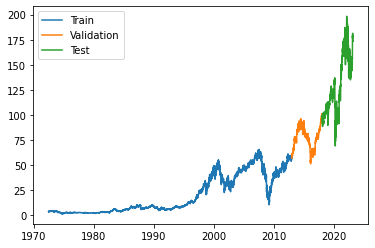

In [15]:
i_80 = int(len(dates)*.8)
i_90 = int(len(dates)*.9)

dates_train, x_train, y_train = dates[:i_80], x[:i_80], y[:i_80]
dates_val, x_val, y_val = dates[i_80:i_90], x[i_80:i_90], y[i_80:i_90]
dates_test, x_test, y_test = dates[i_90:], x[i_90:], y[i_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train','Validation','Test'])